1) Load Data

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/train.csv")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Shape: (1000, 12)
Columns: ['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation', 'qa']


,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,qa
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,"{\n ""knowledge"": [\n {\n ""customer_su..."
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,"{\n ""knowledge"": [\n {\n ""customer_su..."
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,"{\n ""knowledge"": [\n {\n ""customer_su..."
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...","{\n ""knowledge"": [\n {\n ""customer_su..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,"{\n ""knowledge"": [\n {\n ""customer_su..."


2) Data Types & Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   1000 non-null   object
 1   issue_category               1000 non-null   object
 2   issue_sub_category           1000 non-null   object
 3   issue_category_sub_category  1000 non-null   object
 4   customer_sentiment           1000 non-null   object
 5   product_category             1000 non-null   object
 6   product_sub_category         1000 non-null   object
 7   issue_complexity             1000 non-null   object
 8   agent_experience_level       1000 non-null   object
 9   agent_experience_level_desc  1000 non-null   object
 10  conversation                 1000 non-null   object
 11  qa                           1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


3) Missing Values

In [3]:
missing = df.isnull().sum()
print("Missing Values:")
print(missing)
print(f"\nTotal missing: {missing.sum()}")

Missing Values:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
qa                             0
dtype: int64

Total missing: 0


4) Duplicates Check

In [4]:
print(f"Full row duplicates: {df.duplicated().sum()}")
print(f"Conversation duplicates: {df['conversation'].duplicated().sum()}")

Full row duplicates: 0
Conversation duplicates: 2


5) Unique Values per Column

In [5]:
for col in df.columns:
    if col not in ['conversation', 'qa']:
        print(f"\n{'='*40}")
        print(f"{col} ({df[col].nunique()} unique values):")
        print(df[col].value_counts())


issue_area (6 unique values):
issue_area
Cancellations and returns    286
Order                        270
Login and Account            151
Shopping                     116
Warranty                     105
Shipping                      72
Name: count, dtype: int64

issue_category (40 unique values):
issue_category
Return and Exchange                                        95
Order Delivery Issues                                      91
Pickup and Shipping                                        66
Mobile Number and Email Verification                       59
Replacement and Return Process                             58
Returns and Refunds                                        37
Invoice and Payment                                        36
Pricing and Discounts                                      36
Order Confirmation and Status                              35
Lost or Missing Warranty Card                              32
Cash on Delivery (CoD) Refunds                             29
P

6) Issue Area Distribution

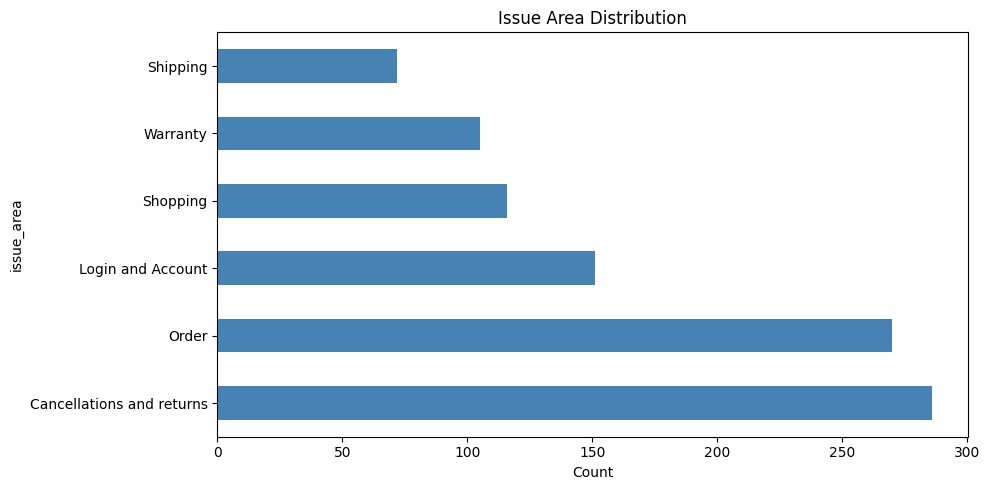

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
df['issue_area'].value_counts().plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Issue Area Distribution')
ax.set_xlabel('Count')
plt.tight_layout()
plt.show()

7) Customer Sentiment Distribution

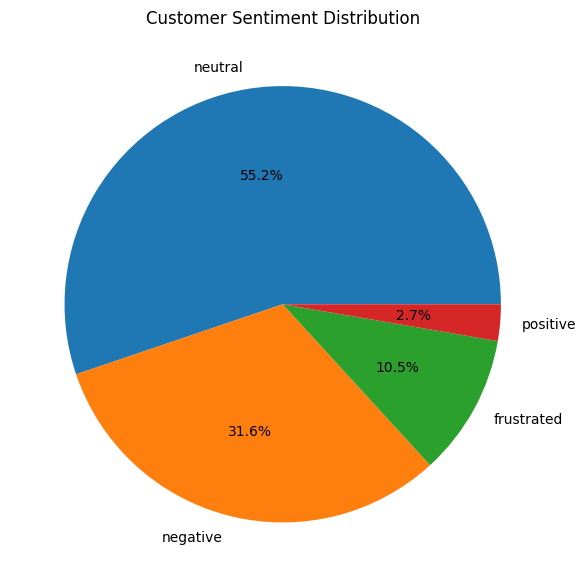

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
df['customer_sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_title('Customer Sentiment Distribution')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

8) Issue Complexity Distribution

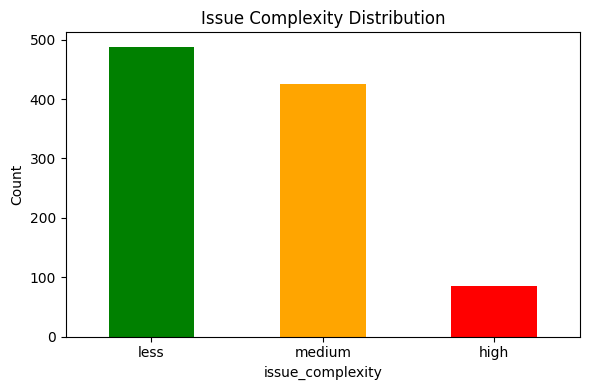

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
df['issue_complexity'].value_counts().plot(kind='bar', ax=ax, color=['green', 'orange', 'red'])
ax.set_title('Issue Complexity Distribution')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

9) Conversation Length Analysis

Min length: 46
Max length: 5708
Mean length: 2131
Median length: 2060
Very short (<100 chars): 3
Very short (<500 chars): 3


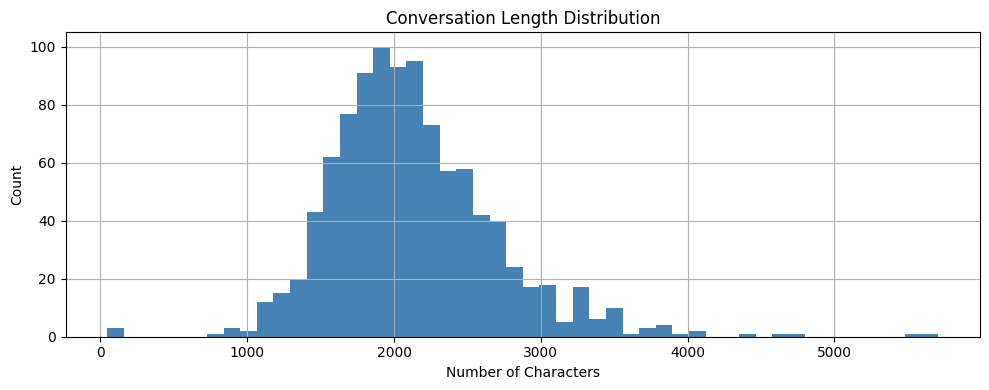

In [9]:
df['conv_length'] = df['conversation'].str.len()

print(f"Min length: {df['conv_length'].min()}")
print(f"Max length: {df['conv_length'].max()}")
print(f"Mean length: {df['conv_length'].mean():.0f}")
print(f"Median length: {df['conv_length'].median():.0f}")
print(f"Very short (<100 chars): {(df['conv_length'] < 100).sum()}")
print(f"Very short (<500 chars): {(df['conv_length'] < 500).sum()}")

fig, ax = plt.subplots(figsize=(10, 4))
df['conv_length'].hist(bins=50, ax=ax, color='steelblue')
ax.set_title('Conversation Length Distribution')
ax.set_xlabel('Number of Characters')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

10) QA Pairs Quality Check

In [10]:
valid_qa = 0
invalid_qa = 0
total_pairs = 0
empty_questions = 0
empty_solutions = 0
pairs_per_row = []

for qa_str in df['qa']:
    try:
        qa = json.loads(qa_str)
        if 'knowledge' in qa and len(qa['knowledge']) > 0:
            valid_qa += 1
            pairs_per_row.append(len(qa['knowledge']))
            total_pairs += len(qa['knowledge'])
            for pair in qa['knowledge']:
                if not pair.get('customer_summary_question', '').strip():
                    empty_questions += 1
                if not pair.get('agent_summary_solution', '').strip():
                    empty_solutions += 1
        else:
            invalid_qa += 1
            pairs_per_row.append(0)
    except:
        invalid_qa += 1
        pairs_per_row.append(0)

print(f"Valid QA rows: {valid_qa}/{len(df)}")
print(f"Invalid QA rows: {invalid_qa}")
print(f"Total QA pairs: {total_pairs}")
print(f"Empty questions: {empty_questions}")
print(f"Empty solutions: {empty_solutions}")
print(f"Avg pairs per row: {sum(pairs_per_row)/len(pairs_per_row):.1f}")

Valid QA rows: 992/1000
Invalid QA rows: 8
Total QA pairs: 1892
Empty questions: 6
Empty solutions: 6
Avg pairs per row: 1.9


11) Complexity vs Sentiment

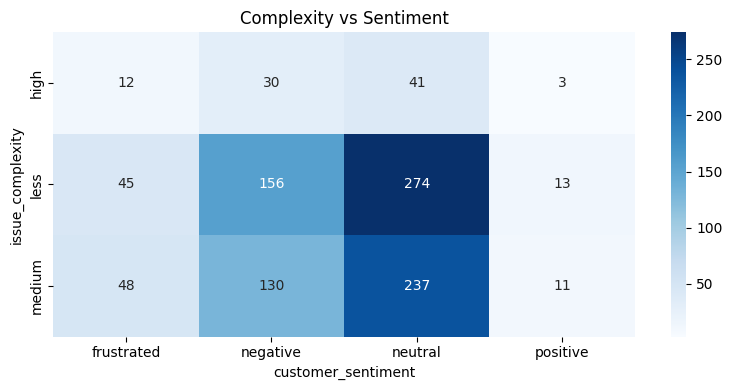

In [11]:
cross = pd.crosstab(df['issue_complexity'], df['customer_sentiment'])
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(cross, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Complexity vs Sentiment')
plt.tight_layout()
plt.show()

12) Sample Conversations

In [12]:
for i in range(3):
    print(f"\n{'='*60}")
    print(f"Example {i+1}")
    print(f"Issue Area: {df.iloc[i]['issue_area']}")
    print(f"Category: {df.iloc[i]['issue_category']}")
    print(f"Sentiment: {df.iloc[i]['customer_sentiment']}")
    print(f"Complexity: {df.iloc[i]['issue_complexity']}")
    print(f"\nConversation (first 500 chars):")
    print(df.iloc[i]['conversation'][:500])
    print("...")


Example 1
Issue Area: Login and Account
Category: Mobile Number and Email Verification
Sentiment: neutral
Complexity: medium

Conversation (first 500 chars):
Agent: Thank you for calling BrownBox Customer Support. My name is Tom. How may I assist you today?

Customer: Hi Tom, I'm trying to log in to my account to purchase an Oven Toaster Grill (OTG), but I'm unable to proceed as it's asking for mobile number or email verification. Can you help me with that?

Agent: Sure, I can assist you with that. May I know your registered mobile number or email address, please?

Customer: My registered mobile number is +1 123-456-7890.

Agent: Thank you. Let me ch
...

Example 2
Issue Area: Cancellations and returns
Category: Pickup and Shipping
Sentiment: neutral
Complexity: less

Conversation (first 500 chars):
Agent: Thank you for calling BrownBox customer support. My name is Alex. How may I assist you today?

Customer: Hi Alex. I recently received an email from BrownBox requesting me to ship ba

13) Final Summary

In [13]:
print("="*50)
print("DATA QUALITY SUMMARY")
print("="*50)
print(f"Total rows: {len(df)}")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Valid QA pairs: {valid_qa}/{len(df)}")
print(f"Very short conversations (<100 chars): {(df['conv_length'] < 100).sum()}")
print(f"\nConclusion:")
if df.isnull().sum().sum() == 0:
    print("✅ No missing values")
if df.duplicated().sum() < 5:
    print("✅ No significant duplicates")
if valid_qa > len(df) * 0.95:
    print("✅ QA pairs quality is good")
print("✅ Data is ready for preprocessing!")

DATA QUALITY SUMMARY
Total rows: 1000
Duplicates: 0
Missing values: 0
Valid QA pairs: 992/1000
Very short conversations (<100 chars): 3

Conclusion:
✅ No missing values
✅ No significant duplicates
✅ QA pairs quality is good
✅ Data is ready for preprocessing!
